## Business Understanding

**Business Goal**

  We are required to model the price of cars with the available independent variables. It will be used by the management **to understand how exactly the prices vary with the independent variables.** They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Data Understanding

In [8]:
#import library
import pandas as pd
import numpy as np
# import drive to Google Colab
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
import warnings
warnings.filterwarnings('ignore')

In [14]:
#Make DataFrame column view wider
pd.set_option('display.max_colwidth', 200)
#Read file
df = pd.read_csv('F:\Car_Price_Predictions\data\CarPrice_Assignment.csv')

In [15]:
#read_data
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
#Drop Car_ID
df.drop('car_ID', axis=1, inplace=True)

In [17]:
#Descriptive Statistics
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [18]:
#data type
df.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
#Get Car Name
df['CarName'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
#Change Typo Car Name
df.replace({'CarName':{'maxda':'mazda', 'Nissan':'nissan', 'porcshce':'porsche', 'toyouta':'toyota', 'vokswagen':'volkswagen', 'vw':'volkswagen'}}, inplace=True)
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [20]:
# inspect if data is numerical / categorical
df_unique_counts = df.nunique().reset_index()
df_unique_counts.columns = ['column', 'unique_count']
df_unique_counts.sort_values(by='unique_count', ascending=True)

,column,unique_count
2,fueltype,2
3,aspiration,2
4,doornumber,2
7,enginelocation,2
6,drivewheel,3
5,carbody,5
0,symboling,6
14,cylindernumber,7
13,enginetype,7
16,fuelsystem,8


In [21]:
from collections import Counter

# limit printable categoriecal value to max of 10 unique values`
printable_values = df_unique_counts[df_unique_counts['unique_count'] <= 10]['column'].values
print(printable_values)

df_unique_values = []
for pv in printable_values:
    unique_values = df[pv]
    counter_unique_values = Counter(unique_values.values)
    unique_str = ' | '.join(map(str, counter_unique_values.keys()))
    unique_counts = ' | '.join(map(str, counter_unique_values.values()))
    df_unique_values.append({'column': pv, 'unique_values': unique_str, 'unique_count': unique_counts})

result_df = pd.DataFrame(df_unique_values)
result_df

['symboling' 'fueltype' 'aspiration' 'doornumber' 'carbody' 'drivewheel'
 'enginelocation' 'enginetype' 'cylindernumber' 'fuelsystem']


,column,unique_values,unique_count
0,symboling,3 | 1 | 2 | 0 | -1 | -2,27 | 54 | 32 | 67 | 22 | 3
1,fueltype,gas | diesel,185 | 20
2,aspiration,std | turbo,168 | 37
3,doornumber,two | four,90 | 115
4,carbody,convertible | hatchback | sedan | wagon | hardtop,6 | 70 | 96 | 25 | 8
5,drivewheel,rwd | fwd | 4wd,76 | 120 | 9
6,enginelocation,front | rear,202 | 3
7,enginetype,dohc | ohcv | ohc | l | rotor | ohcf | dohcv,12 | 13 | 148 | 12 | 4 | 15 | 1
8,cylindernumber,four | six | five | three | twelve | two | eight,159 | 24 | 11 | 1 | 1 | 4 | 5
9,fuelsystem,mpfi | 2bbl | mfi | 1bbl | spfi | 4bbl | idi | spdi,94 | 66 | 1 | 11 | 1 | 3 | 20 | 9


**DATA TYPE and Descriptions**

car_ID: Unique ID # for each car

CATEGORICAL


---
* Symboling: Acturian assessment of risk of the car (numerical values where -3 is safe, +3 is risky)
* Fueltype: Car Fuel Type (gas or diesel)
* Fuelsystem: Type of car fuel system (1bbl, 2 bbl, 4 bbl, idi, mfi, mpfi, spdi, or spfi)
* Aspiration: Car Aspiration (standard or turbo)
* Doornumber: Number of car doors (two or four)
* Carbody: Type of car body (convertible, sedan, hatchback, wagon, or hardtop)
* Drivewheel: Car drive wheel (rear wheel drive, 4 wheel drive or front wheel drive)
* Enginelocation: Location of car engine (front of rear)
* Enginetype: Car engine type (dohc, dohcv, I, ohc, ohcf, ohcv, or rotor)
* Cylindernumber: Number of car cylinders (two, three, four, five, six, eight, or twelve)

NUMERICAL


---
* Wheelbase: Car wheel base in inches
* Carlength: Car length in inches
* Carwidth: Car width in inches
* Carheight: Car height in inches
* Curbweight: Car weight in pounds
* Enginesize: Size of engine (numerical values of cubic inches)
* Boreratio: Car Bore-Stroke Ratio is the ratio between the dimensions of the engine cylinder bore diameter to its piston stroke-length
* Stroke: Car strokes (numerical value in strokes)
* Compressionratio: Car compression ratio (ratio between the volume of the cylinder with the piston in the bottom position, Vbottom (largest volume), and in the top position, Vtop (smallest volume))
* Horsepower: Car horsepower (numerical values of horsepower)
* Peakrpm: Car peak RPM (revolutions per minute)
* Citympg: Car city MPG (miles per gallon)
* Highwaympg: Car highway MPG (miles per gallon)
* Price: total price of car in dollars (Y, Taget variable)

# Data Preparation

In [ ]:
#Checking missing values
# check NaN data
print("[ NaN data count ]")
print(df[printable_values].apply(lambda col: col.isna().sum()))
print("-----")

# check empty data
print("[ empty data count ]")
print(df[printable_values].apply(lambda col: (col == '').sum()))
print("-----")

# check invalid data "."
print("[ invalid data ]")
print(df[printable_values].apply(lambda col: (col == '.').sum()))
print("-----")

[ NaN data count ]
symboling         0
fueltype          0
aspiration        0
doornumber        0
carbody           0
drivewheel        0
enginelocation    0
enginetype        0
cylindernumber    0
fuelsystem        0
dtype: int64
-----
[ empty data count ]
symboling         0
fueltype          0
aspiration        0
doornumber        0
carbody           0
drivewheel        0
enginelocation    0
enginetype        0
cylindernumber    0
fuelsystem        0
dtype: int64
-----
[ invalid data ]
symboling         0
fueltype          0
aspiration        0
doornumber        0
carbody           0
drivewheel        0
enginelocation    0
enginetype        0
cylindernumber    0
fuelsystem        0
dtype: int64
-----


In [ ]:
int_columns = df.select_dtypes('int64').columns
float_columns = df.select_dtypes('float64').columns

# check NaN data
print("[ NaN data count (int64) ]")
print(df[int_columns].apply(lambda col: col.isna().sum()))
print("-----")

print("[ NaN data count (float64) ]")
print(df[float_columns].apply(lambda col: col.isna().sum()))
print("-----")


# check empty data
print("[ empty data count (int64) ]")
print(df[int_columns].apply(lambda col: (col == '').sum()))
print("-----")

# check empty data
print("[ empty data count (float64) ]")
print(df[float_columns].apply(lambda col: (col == '').sum()))
print("-----")

[ NaN data count (int64) ]
symboling     0
curbweight    0
enginesize    0
horsepower    0
peakrpm       0
citympg       0
highwaympg    0
dtype: int64
-----
[ NaN data count (float64) ]
wheelbase           0
carlength           0
carwidth            0
carheight           0
boreratio           0
stroke              0
compressionratio    0
price               0
dtype: int64
-----
[ empty data count (int64) ]
symboling     0
curbweight    0
enginesize    0
horsepower    0
peakrpm       0
citympg       0
highwaympg    0
dtype: int64
-----
[ empty data count (float64) ]
wheelbase           0
carlength           0
carwidth            0
carheight           0
boreratio           0
stroke              0
compressionratio    0
price               0
dtype: int64
-----


## Exploratory Data Analysis

In [ ]:
#Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

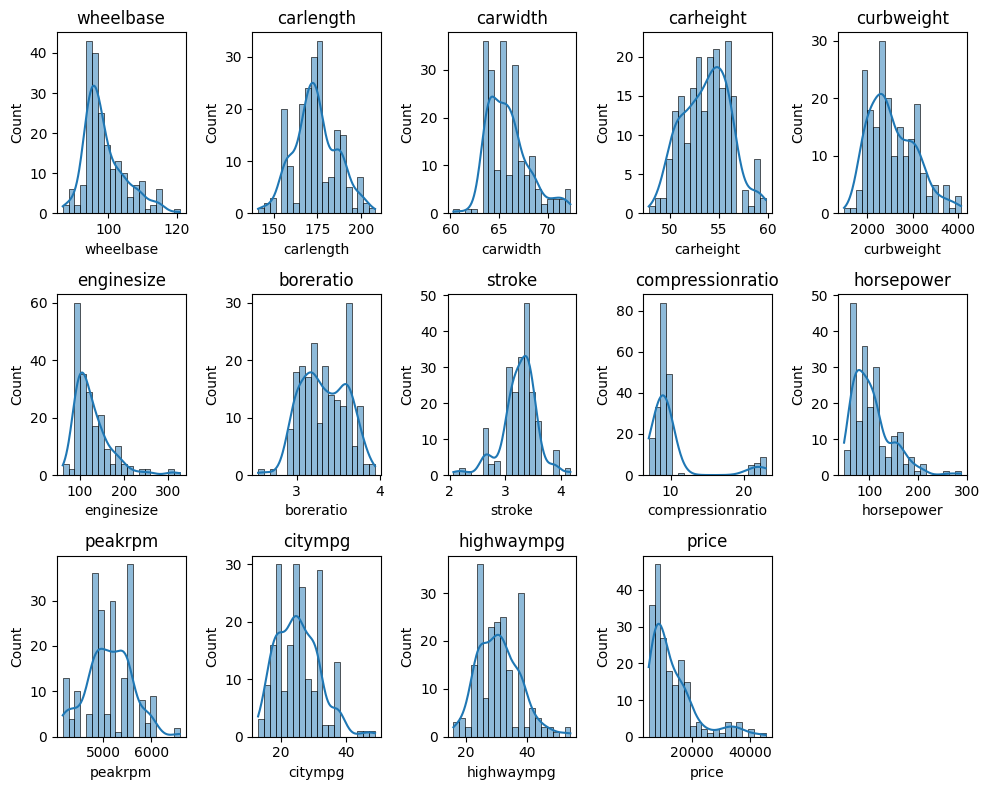

In [ ]:
#Numerical Data Distribution
numCol = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
          'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(10, 8))
for features in numCol:
    plt.subplot(3, 5, numCol.index(features) + 1)
    sns.histplot(data=df[features], bins=20, kde=True)
    plt.title(features)
plt.tight_layout()
plt.show()

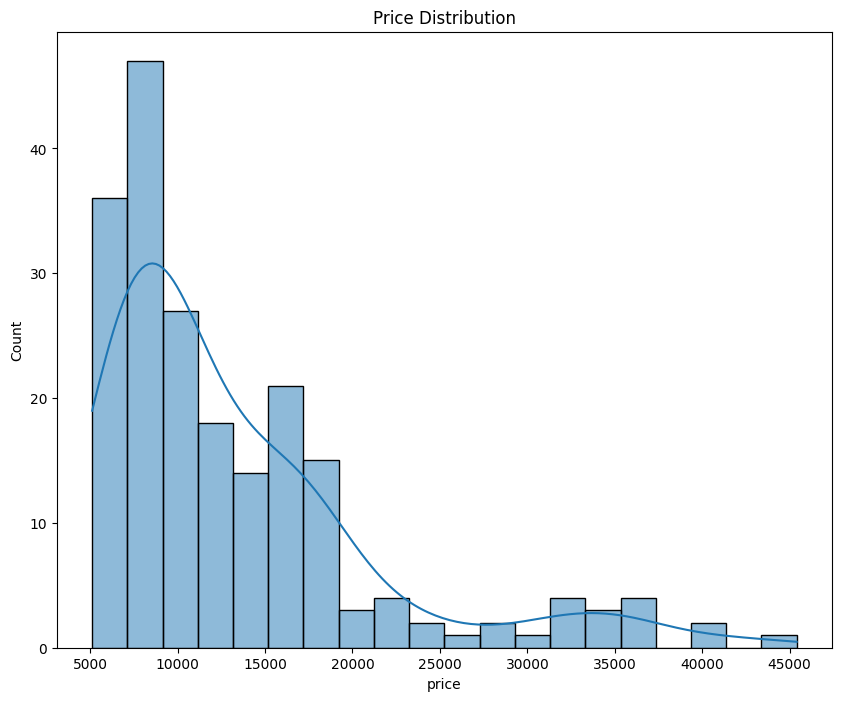

In [ ]:
#Price Distribution
plt.figure(figsize=(10, 8))
sns.histplot(data=df['price'], bins=20, kde=True)
plt.title('Price Distribution')
plt.show()

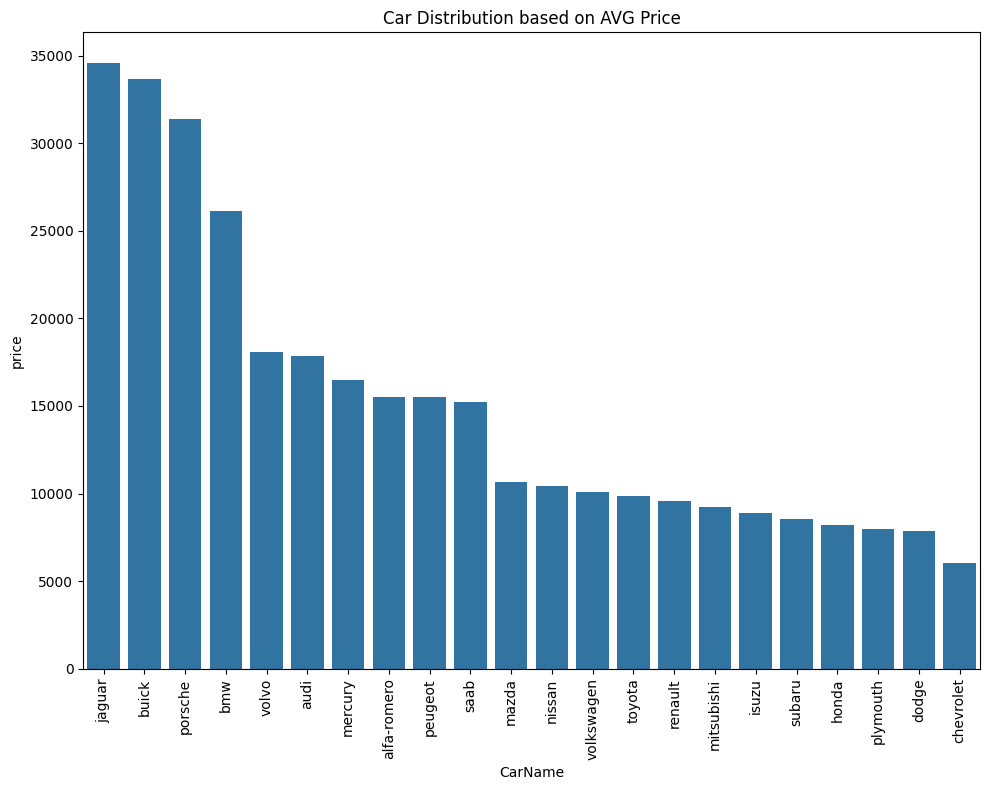

In [ ]:
#Car Distribution based on AVG Price
avg_carPrice = df.groupby('CarName')['price'].mean().reset_index()
avg_carPrice = avg_carPrice.sort_values(by='price', ascending=False)#sort by values

plt.figure(figsize=(10, 8))
sns.barplot(data=avg_carPrice, x='CarName', y='price')
plt.xticks(rotation=90)
plt.title('Car Distribution based on AVG Price')
plt.tight_layout()
plt.show()

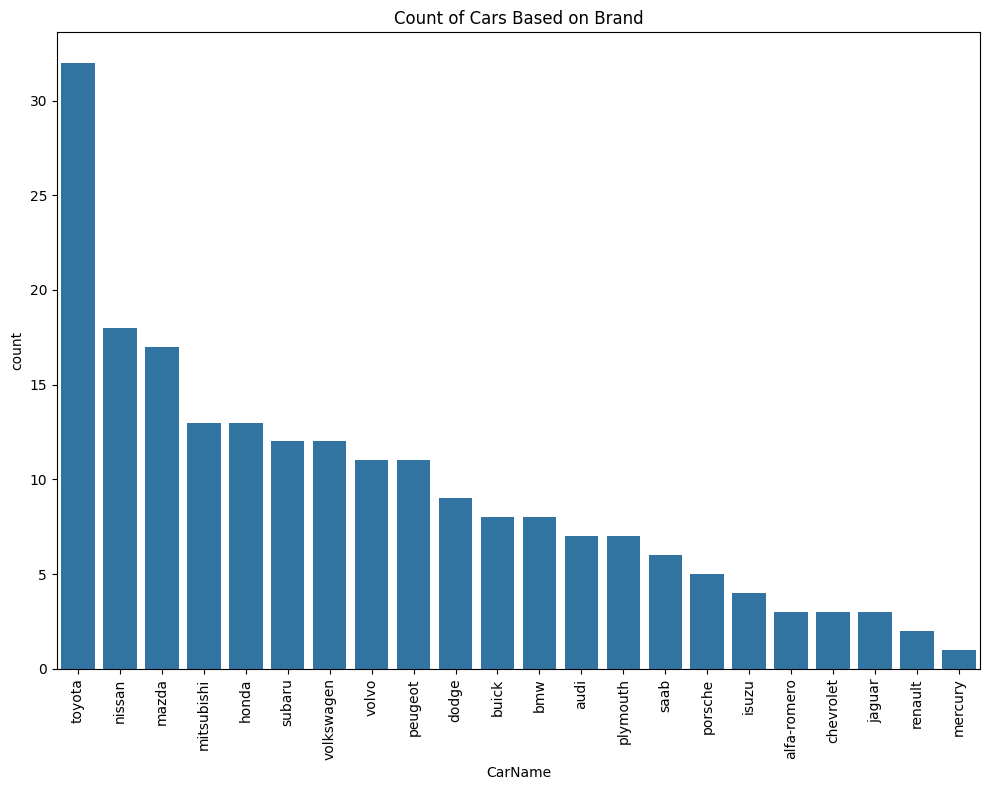

In [ ]:
#Count Car Based on Brand
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='CarName', order=df['CarName'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Count of Cars Based on Brand')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3783250664.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
/tmp/ipython-input-3783250664.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
/tmp/ipython-input-3783250664.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
/tmp/ipython-input-3783250664.py:10: FutureWarning: 

Passing `palette` without as

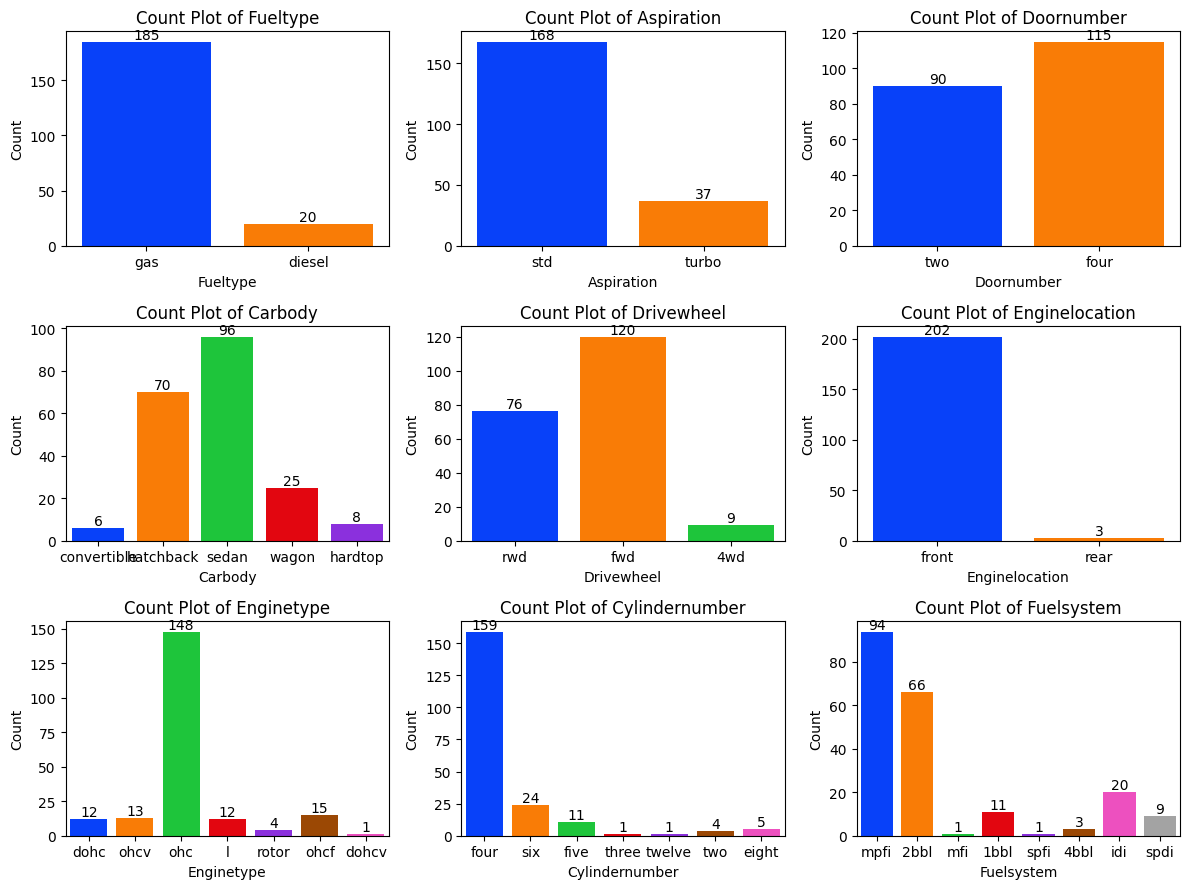

In [ ]:
#Count Categorical Columns
catCol = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
          'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(catCol):
    sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

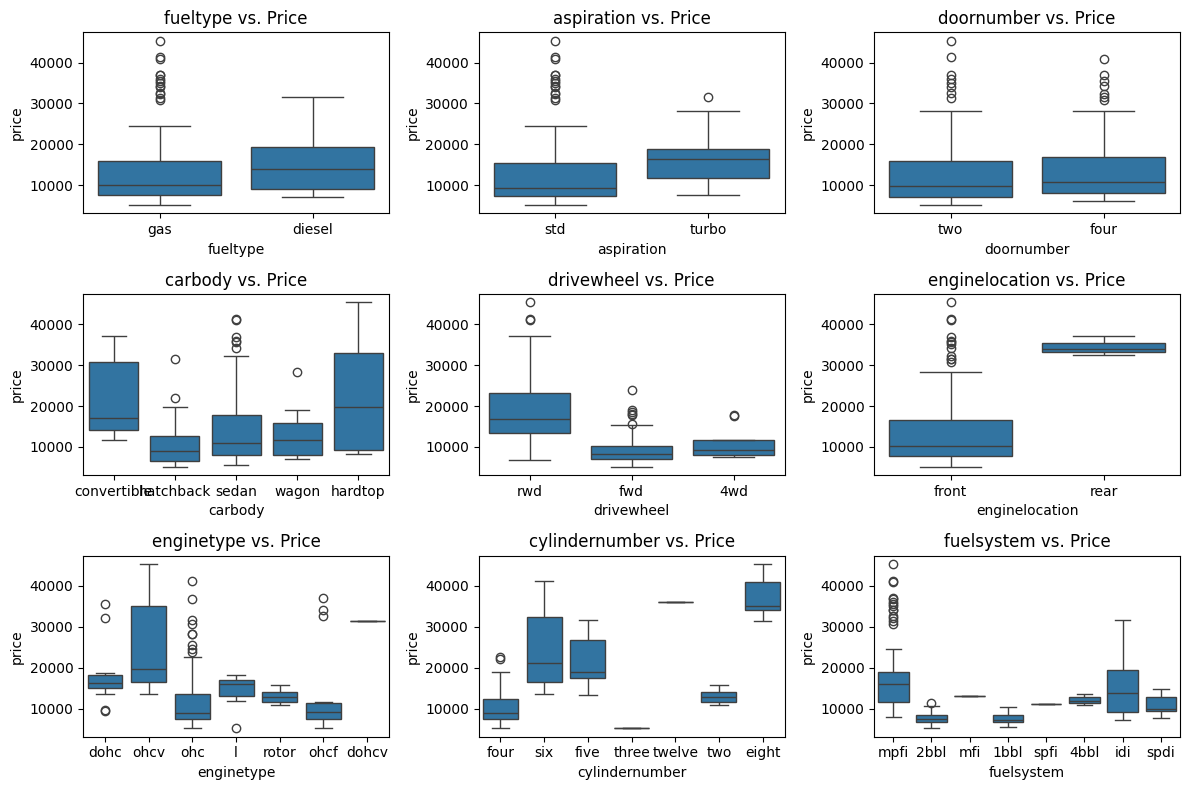

In [ ]:
plt.figure(figsize=(12, 8))
for features in catCol:
    plt.subplot(3, 3, catCol.index(features) + 1)
    sns.boxplot(data=df, x=features, y='price')
    plt.title(f'{features} vs. Price')
plt.tight_layout()
plt.show()

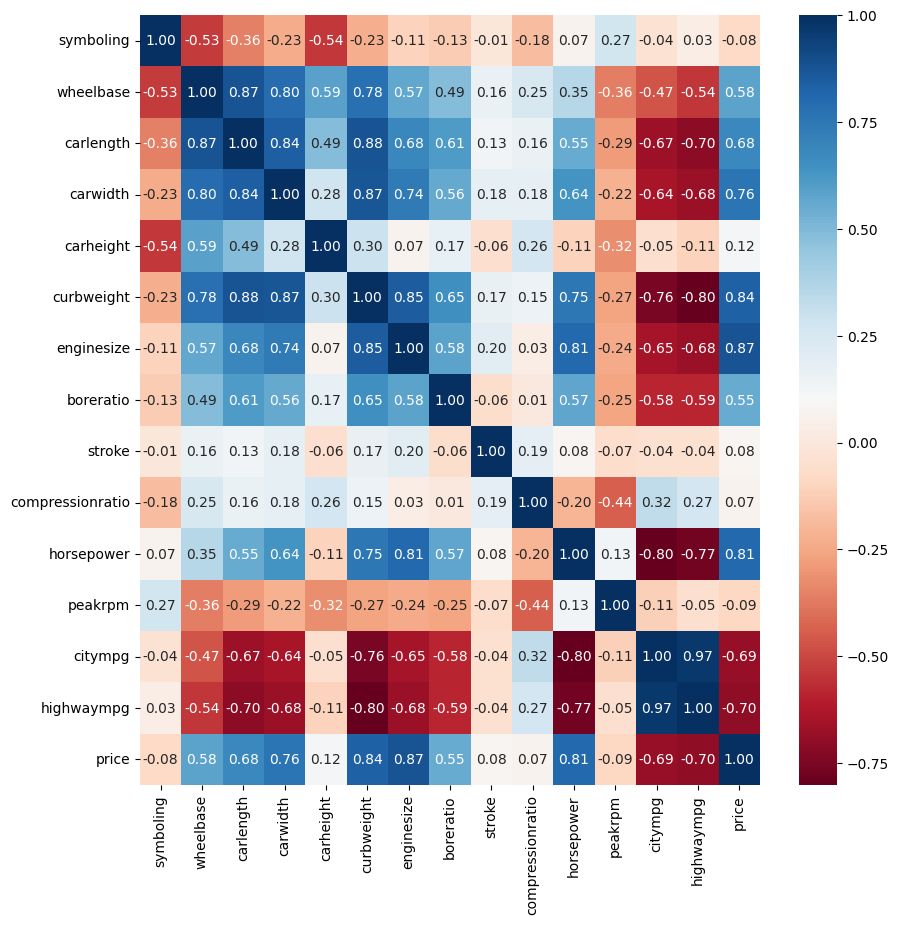

In [ ]:
#Data Correlation
dfCorr=['symboling','wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
          'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
df_corr = df[dfCorr].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(data=df_corr, annot=True, fmt=".2f", cmap='RdBu')
plt.show()

In [ ]:
df_corr[['price']].sort_values(by='price', ascending=False)

,price
price,1.000000
enginesize,0.874145
curbweight,0.835305
horsepower,0.808139
carwidth,0.759325
carlength,0.682920
wheelbase,0.577816
boreratio,0.553173
carheight,0.119336
stroke,0.079443


In the correlation matrix, we can see more evidence that some physiological features are strongly related to specific penguin species. Look at the correlation values that are less than -0.6 or more than 0.6:
* EngineSize
* Curbweight
* HorsePower
* CarWidth
* CarLength
* CityMpg -> berkolerasi negatif
* Highwaympg -> berkolerasi negatif

## Feature Engineering

In [ ]:
#define Categorical and Numerical Columns
df1_catCol = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel','enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
df1_numCol = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
              'horsepower', 'peakrpm', 'citympg', 'highwaympg']

In [ ]:
from math import remainder
# Handling categorical variables
df1 = df.copy() #copy data, protect data if make a mistake not affected main data
#One-Hot Encoding
df1 = pd.get_dummies(df1, columns=df1_catCol, drop_first=True)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1[df1_numCol] = scaler.fit_transform(df1[df1_numCol])

# Modeling

In [ ]:
#Train Model
#Split Dataset
from sklearn.model_selection import train_test_split
X = df1.drop(['price', 'symboling', 'CarName'], axis=1)
y = df1['price']

In [ ]:
#Modeling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training with Linear Regression
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test) #prediction

#Model Training with Random Forest Regressor
rfr=RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test) #prediction

## Price Prediction Using Linear Regression

In [ ]:
prediction_lr=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_lr,'Difference':y_test-y_pred_lr})
prediction_lr.head()

,Actual Value,Predicted Value,Difference
15,30760.000,28709.892208,2050.107792
9,17859.167,20249.665458,-2390.498458
100,9549.000,10764.255756,-1215.255756
132,11850.000,12564.330717,-714.330717
68,28248.000,27600.920006,647.079994


<Axes: >

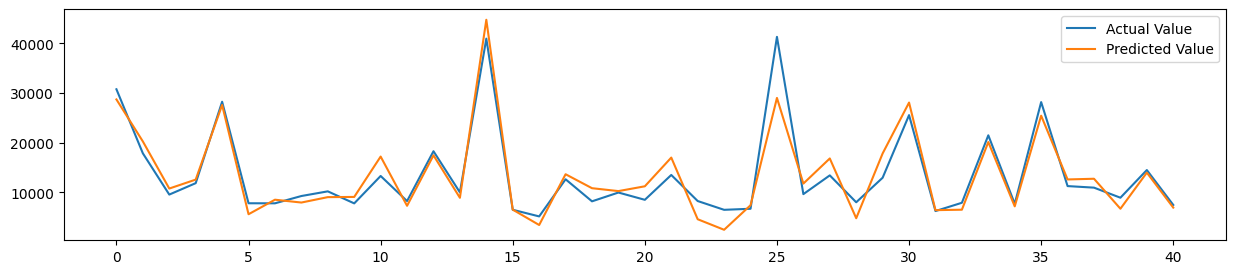

In [ ]:
#compare actual and prediction value
compare=pd.DataFrame({'Actual Value':y_test.values.flatten(),'Predicted Value':y_pred_lr})
compare.head(50).plot(kind='line',figsize=(15,3))

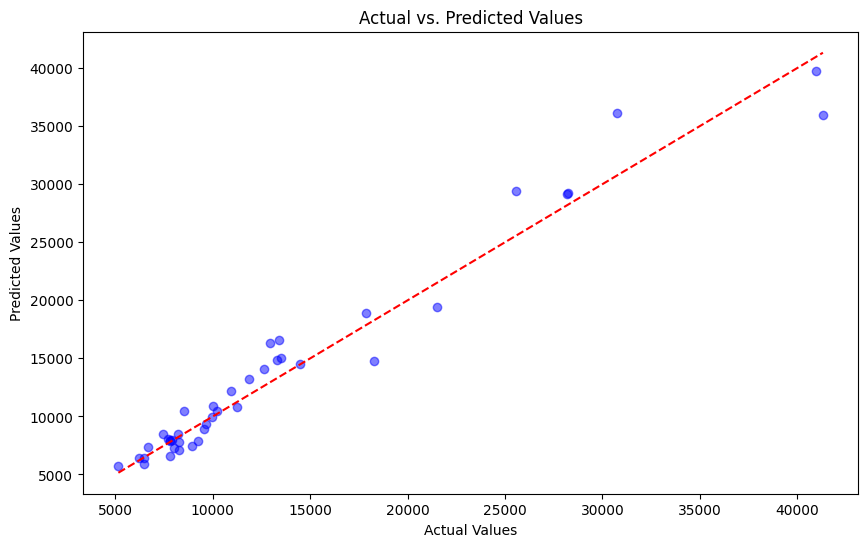

In [ ]:
#Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rfr
            , c='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

## Price Prediction Using Random Forest Regression

In [ ]:
prediction=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_rfr,'Difference':y_test-y_pred_rfr})
prediction.head()

,Actual Value,Predicted Value,Difference
15,30760.000,36152.080000,-5392.080000
9,17859.167,18877.600000,-1018.433000
100,9549.000,8940.250000,608.750000
132,11850.000,13254.403333,-1404.403333
68,28248.000,29222.155000,-974.155000


<Axes: >

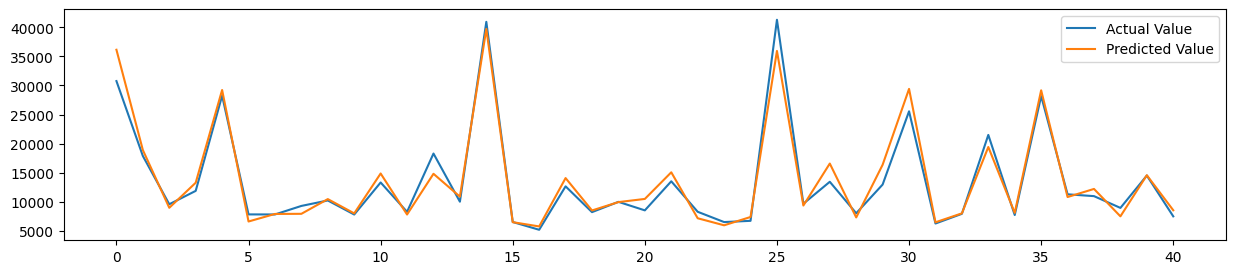

In [ ]:
#compare actual and prediction value
compare=pd.DataFrame({'Actual Value':y_test.values.flatten(),'Predicted Value':y_pred_rfr})
compare.head(50).plot(kind='line',figsize=(15,3))

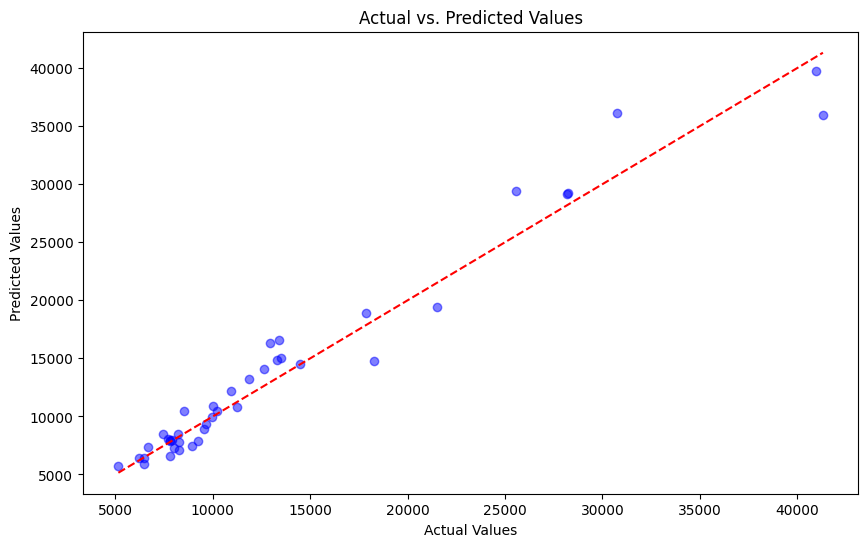

In [ ]:
#Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rfr
            , c='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

## Evaluation

In [ ]:
#Compare Matrix Evaluation
r2_lr = lr.score(X_test, y_test)
r2_rfr = rfr.score(X_test, y_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))

models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor'],
    'R2 Score': [r2_lr, r2_rfr],
    'MAE': [mae_lr, mae_rfr],
    'RMSE': [rmse_lr, rmse_rfr]
})
print(models)

                     Model  R2 Score          MAE         RMSE
0        Linear Regression  0.893109  2089.575687  2904.893837
1  Random Forest Regressor  0.956486  1295.187837  1853.418866


## Features Importance

In [ ]:
#Get Top 10 Features Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rfr.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance.head(10)

,Feature,Importance
5,enginesize,0.605053
4,curbweight,0.227931
12,highwaympg,0.049031
9,horsepower,0.034342
2,carwidth,0.018874
0,wheelbase,0.012207
11,citympg,0.009638
1,carlength,0.009385
10,peakrpm,0.005731
7,stroke,0.004406


## Hyperparameter Tuning

In [ ]:
#Hyperparameter tuning using Random Forest Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Define categorical and numerical columns
df1_catCol = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel','enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
df1_numCol = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
              'horsepower', 'peakrpm', 'citympg', 'highwaympg']


# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), df1_numCol),
        ('cat', OneHotEncoder(handle_unknown='ignore'), df1_catCol)
    ],
    remainder='passthrough' # Keep other columns (like 'CarName' and 'symboling' if not dropped earlier)
)


# Define the model
rfr_tuning = RandomForestRegressor(random_state=1)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', rfr_tuning)])

# Define a reduced parameter grid
hyperparam_space_rfr = {
    'model__n_estimators': [100, 150, 200], # Reduced number of trees
    'model__max_depth': [5, 10, 15, 20], # Reduced max depth values
    'model__min_samples_split': [2, 5, 10], # Add min_samples_split
    'model__min_samples_leaf': [1, 2, 4], # Add min_samples_leaf
    'model__max_features': ['sqrt', 'log2'], # Add max_features
    'model__bootstrap': [True, False] # Add bootstrap
}


# Define cross-validation
crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter Tuning using GridSearchCV
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=hyperparam_space_rfr,
                           cv=crossval,
                           scoring='r2', # Use r2 as the scoring metric
                           n_jobs=-1)

# Split data *after* defining the pipeline
X = df.drop(['price', 'symboling', 'CarName'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['wheelbase',
                                                                          'carlength',
                                                                          'carwidth',
                                                                          'carheight',
                                                                          'curbweight',
                                                                          'enginesize',
                                                                          'boreratio',
                                                                          'stroke',
                                                                          'compressionratio',
                                                                          'horsepower',
                                                                          'peakrpm',
                                                                          'citympg',
                                                                          'highwaympg']),
                                                                        ('ca...
                                                                          'enginelocation',
                                                                          'enginetype',
                                                                          'cylindernumber',
                                                                          'fuelsystem'])])),
                                       ('model',
                                        RandomForestRegressor(random_state=1))]),
             n_jobs=-1,
             param_grid={'model__bootstrap': [True, False],
                         'model__max_depth': [5, 10, 15, 20],
                         'model__max_features': ['sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 150, 200]},
             scoring='r2')

In [ ]:
# Use the best estimator from GridSearchCV for evaluation
best_rfr_tuning_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_rfr_tuning = best_rfr_tuning_model.predict(X_test)

#save best r2, rmse, and mae value after tuning
r2_rfr_tuning = best_rfr_tuning_model.score(X_test, y_test)
mae_rfr_tuning = mean_absolute_error(y_test, y_pred_rfr_tuning)
rmse_rfr_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rfr_tuning))

#Print score after tuning
score_after_tuning=pd.DataFrame({'Model':['Random Forest Regressor Tuning'],'R2 Score':[r2_rfr_tuning],'MAE':[mae_rfr_tuning],'RMSE':[rmse_rfr_tuning]})
print(score_after_tuning)

                            Model  R2 Score          MAE         RMSE
0  Random Forest Regressor Tuning  0.921444  1475.459123  2490.292895


In [ ]:
#save model
import pickle
filename = 'model_rfr_tuning.pkl'
pickle.dump(best_rfr_tuning_model, open(filename, 'wb'))

In [ ]:
#load model
filename = 'model_rfr_tuning.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# Create a sample dataframe with values for numerical and categorical features
sample_data = {
    'wheelbase': [95.0],
    'carlength': [170.0],
    'carwidth': [65.0],
    'carheight': [55.0],
    'curbweight': [2500],
    'enginesize': [120],
    'boreratio': [3.3],
    'stroke': [3.2],
    'compressionratio': [9.0],
    'horsepower': [100],
    'peakrpm': [5000],
    'citympg':[25],
    'highwaympg': [30],
    'fueltype': ['gas'],
    'aspiration': ['std'],
    'doornumber': ['four'],
    'carbody': ['sedan'],
    'drivewheel': ['fwd'],
    'enginelocation': ['front'],
    'enginetype': ['ohc'],
    'cylindernumber': ['four'],
    'fuelsystem': ['mpfi']
}
sample_df = pd.DataFrame(sample_data)

# Make prediction with the loaded model
# Since the pipeline now includes preprocessing, we can pass the raw sample_df
prediction_new_sample = loaded_model.predict(sample_df)

# Output the prediction
print(f"Price Prediction for the new sample: {prediction_new_sample[0]}")

Price Prediction for the new sample: 9963.325


# Deployment